# The $z$-Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Theorems

The theorems of the $z$-transform relate basic operations applied to discrete signals to their equivalents in the spectral domain. They are of use for the computation of $z$-transforms of signals composed from modified [standard signals](../continuous_signals/standard_signals.ipynb) and for the computation of the response of systems to an input signal. The theorems allow further to predict the consequences of modifying a signal or system by certain operations.

### Convolution Theorem

The convolution theorem states that the $z$-transform of the linear convolution of two discrete signals $x[k]$ and $y[k]$ is equal to the scalar multiplication of their $z$-transforms $X(z)$ and $Y(z)$

\begin{equation}
\mathcal{Z} \{ x[k] * y[k] \} = X(z) \cdot Y(z)
\end{equation}

under the assumption that both transforms $X(z) = \mathcal{Z} \{ x[k] \}$ and $Y(z) = \mathcal{Z} \{ y[k] \}$ exist, respectively. The ROC of the linear convolution $x(t) * y(t)$ includes at least the intersection of the ROCs of $x[k]$ and $y[k]$

\begin{equation}
\text{ROC} \{ x[k] * y[k] \} \supseteq \text{ROC} \{ x[k] \} \cap \text{ROC} \{ y[k] \}
\end{equation}


The theorem can be proven by introducing the [definition of the linear convolution](../discrete_systems/linear_convolution.ipynb) into the [definition of the $z$-transform](definition.ipynb) and changing the order of summation

\begin{align}
\mathcal{Z} \{ x[k] * y[k] \} &= \sum_{k = -\infty}^{\infty} \left( \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot y[k - \kappa] \right) z^{-k} \\
&= \sum_{\kappa = -\infty}^{\infty} \left( \sum_{k = -\infty}^{\infty} y[k - \kappa] \, z^{-k} \right) x[\kappa] \\
&= Y(z) \cdot \sum_{\kappa = -\infty}^{\infty} x[\kappa] \, z^{-\kappa} \\
&= Y(z) \cdot X(z)
\end{align}

The convolution theorem is very useful in the context of linear time-invariant (LTI) systems. The output signal $y[k]$ of an LTI system is given as the convolution of the input signal $x[k]$ with its impulse response $h[k]$. The signals and their relation can be represented alternatively in the spectral domain using the convolution theorem. This leads to the following two equivalent representations of an LTI system

![Representation of an LTI system in the time- and Laplace-domain](LTI_system_spectral_domain.png)

Calculation of the system response by transforming the problem into the spectral domain can be beneficial since this replaces the evaluation of the linear convolution by a scalar multiplication. In many cases this procedure simplifies the calculation of the system response significantly. The convolution theorem can also be useful to derive a $z$-transform. The key is here to express the signal as convolution of two other signals for which the $z$-transforms are known. This is illustrated by the following example.

**Example**

The [linear convolution of two rectangular signals](../discrete_systems/linear_convolution.ipynb#Finite-Length-Signals) $\text{rect}_N[k] * \text{rect}_M[k]$ results in a finite-length signal of trapezoidal shape. The $z$-transform of this signal is derived by application of the convolution theorem together with the [transform of the rectangular signal](definition.ipynb#Transformation-of-the-Rectangular-Signal). This results in

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] * \text{rect}_M[k] \} 
= \sum_{k=0}^{N-1} z^{-k} \cdot \sum_{k=0}^{M-1} z^{-k}
= \begin{cases}
\frac{1 - z^{-N}}{1 - z^{-1}} \cdot \frac{1 - z^{-M}}{1 - z^{-1}} & \text{for } z \neq 1 \\
N \cdot M & \text{for } z = 1
\end{cases}
\end{equation}

The ROC of the rectangular signal is $z \in \mathbb{C} \setminus \{ 0 \}$. The ROC of the convolution of two rectangular signals is also $z \in \mathbb{C} \setminus \{ 0 \}$, since in general no poles and zeros cancel out. The poles and zeros of $\mathcal{Z} \{ \text{rect}_N[k] * \text{rect}_M[k] \}$ are computed and illustrated in the following.

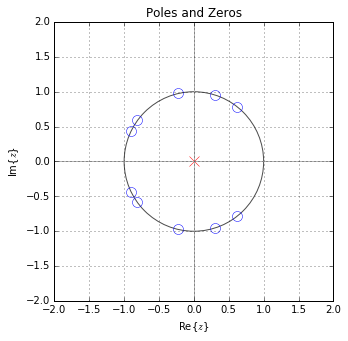

In [1]:
%matplotlib inline
import sympy as sym
from pole_zero_plot import pole_zero_plot
sym.init_printing()

N = 5
M = 7

z = sym.symbols('z', complex=True)
k = sym.symbols('k', integer=True)

X = sym.summation(z**(-k), (k,0,N-1)) * sym.summation(z**(-k), (k,0,M-1))

poles = sym.roots(sym.denom(X) * z, z)
zeros = sym.roots(sym.numer(X) * z**(N+M-2), z)

pole_zero_plot(poles, zeros)

**Exercise**

* Determine the locations of the zeros of the $z$-transform $\mathcal{Z} \{ \text{rect}_N[k] \}$ of a rectangular signal.
* How are the locations of the zeros from above example related to these?

### Shift Theorem

The [shift of a signal](../discrete_signals/operations.ipynb#Shift) $x(k - \kappa)$ for $\kappa \in \mathbb{Z}$ can be expressed by the convolution of the signal $x[k]$ with a shifted Dirac impulse

\begin{equation}
x[k - \kappa] = x[k] * \delta[k - \kappa]
\end{equation}

This follows from the sifting property of the Dirac impulse. Applying a two-sided $z$-transform to the left- and right-hand side and exploiting the convolution theorem yields

\begin{equation}
\mathcal{Z} \{ x[k - \kappa] \} = X(z) \cdot z^{- \kappa}
\end{equation}

where $X(z) = \mathcal{Z} \{ x[k] \}$ is assumed to exist. Note that $\mathcal{Z} \{ \delta[k - \kappa] \} = z^{- \kappa}$ can be derived from the definition of the two-sided $z$-transform together with the sifting property of the Dirac impulse. The $z$-transform of a shifted signal is given by multiplying the $z$-transform of the original signal with $z^{-\kappa}$. The ROC of $x[k-\kappa]$ is given as the ROC of $x[k]$, whereby the points $0$ and $\infty$ have to be regarded separately due to the term $z^{- \kappa}$ in its $z$-transform

\begin{equation}
\text{ROC} \{ x[k - \kappa] \} \supseteq \text{ROC} \{ x[k] \} \setminus \{0, \infty \}
\end{equation}

This result is known as shift theorem of the $z$-transform. For a causal signal $x[k]$ and $\kappa > 0$ the shift theorem of the one-sided $z$-transform is equal to the shift theorem of the two-sided transform.

**Example**

Let's consider a system which delays a signal by a given number of samples. Its output signal $y[k] = \mathcal{H} \{ x[k] \}$ reads

\begin{equation}
y[k] = x[k-\kappa]
\end{equation}

where $\kappa \in \mathbb{N}$. Applying the two-sided $z$-transform to the left- and right-hand side yields

\begin{equation}
Y(z) = z^{-\kappa} \cdot X(z)
\end{equation}

where $Y(z) = \mathcal{Z} \{ y[k] \}$ and $X(z) = \mathcal{Z} \{ y[k] \}$. The transfer function $H(z)$ of the system can be deduced from the spectral representation of the system output $Y(z) = H(z) \cdot X(z)$ as

\begin{equation}
H(z) = z^{- \kappa}
\end{equation}

Delaying a signal is a frequently applied operation in discrete signal processing. Block diagrams illustrating signal processing algorithms frequently contain blocks that constitute delays. These blocks are commonly annotated by the corresponding transfer function $z^{- \kappa}$.

**Exercise**

* Draw a block diagramm illustrating the following difference equation $y[k] = x[k] + 2 x[k-1] + x[k-3]$.

### Modulation Theorem

The complex modulation of a signal $x[k]$ is defined as $z_0^{k} \cdot x[k]$ with $z_0 \in \mathbb{C} \setminus \{ 0 \}$. The $z$-transform of a modulated signal is derived by introducing it into the definition of the two-sided $z$-transform

\begin{equation}
\mathcal{Z} \left\{ z_0^k \cdot x[k] \right\} =
\sum_{k = -\infty}^{\infty} x[k] z_0^k \, z^{-k} =
\sum_{k = -\infty}^{\infty} x[k] \, \left( \frac{z}{z_0} \right)^{-k}
= X \left( \frac{z}{z_0} \right)
\end{equation}

where $X(z) = \mathcal{Z} \{ x[k] \}$. Modulation of the signal $x[k]$ leads to a complex scaling of the $z$-plane by the factor $z_0$. The complex scaling of $z$ can be expressed as

\begin{equation}
\frac{z}{z_0} = \frac{|z|}{|z_0|} \; e^{j (\arg(z) - \arg(z_0))}
\end{equation}

where $\arg(z)$ and $\arg(z_0)$ denote the argument (phase) of $z$ and $z_0$, respectively. It follows from this representation that the complex scaling by $z_0$ can be interpreted as a scaling and rotation of the $z$-plane.

The ROC is also complex scaled 

\begin{equation}
\text{ROC} \{ z_0^k \cdot x[k] \} = \{z: \frac{z}{z_0} \in \text{ROC} \{ x[k] \} \}
\end{equation}

This relation is known as modulation theorem.

**Example**

The $z$-transform of an harmonic exponential signal $e^{j \Omega_0 k}$ of finite duration $N$ is derived the following. The signal can be expressed as $e^{j \Omega_0 k} \cdot \text{rect}_N[k]$ which allows to apply the modulation theorem with $z_0 = e^{j \Omega_0}$. This yields

\begin{equation}
\mathcal{Z} \{ e^{j \Omega_0 k} \cdot \text{rect}_N[k] \} = \sum_{k=0}^{N-1} \left( \frac{z}{e^{j \Omega_0}} \right)^{-k} = e^{j \Omega_0 k} z^{-k}
\end{equation}

for $z \in \mathbb{C} \setminus \{ 0 \}$.

### Reversal

The two-sided $z$-transform of the reversed signal $x[-k]$ of $x[k]$ is given as

\begin{equation}
\mathcal{Z} \{ x[-k] \} = \sum_{k=-\infty}^{\infty} x[-k] \, z^{-k} = \sum_{k=-\infty}^{\infty} x[k] \, z^k =
\sum_{k=-\infty}^{\infty} x[k] \, \left( \frac{1}{z} \right)^{-k} = X \left( \frac{1}{z} \right)
\end{equation}

where $X(z) = \mathcal{Z} \{ x[k] \}$ denotes the $z$-transform of $x[k]$. The revesal of a discrete signal leads to an inversion of the complex frequency $z$ in its $z$-transform. The ROC is given as

\begin{equation}
\text{ROC} \{ x[-k] \} = \{z: \frac{1}{z} \in \text{ROC} \{ x[k] \} \}
\end{equation}

**Example**

The $z$-transform of the anticausal complex exponential signal $x[k] = - z_0^k \cdot \epsilon[k - 1]$ is derived by applying a series of transformations to the complex exponential signal $z_0[k] \cdot \epsilon[k]$. Reversal of the complex exponential signal yields

\begin{equation}
\mathcal{Z} \{ z_o^{-k} \cdot \epsilon[-k] \} = \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

Now the shift theorem is applied to the shifted signal

\begin{equation}
\mathcal{Z} \{ z_o^{-k-1} \cdot \epsilon[-k-1] \} = z \cdot \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

The factor $z_0^{-1}$ is a constant with respect to the $z$-transform. This yields

\begin{equation}
\mathcal{Z} \{ z_o^{-k} \cdot \epsilon[-k-1] \} = z_0 z \cdot \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

By noting that $z_o^{-k} = \left( \frac{1}{z_o} \right)^k$ we get

\begin{equation}
\mathcal{Z} \{ \left( \frac{1}{z_o} \right)^{k} \cdot \epsilon[-k-1] \} = z_0^{-1} z \cdot \frac{z^{-1}}{z^{-1} - z_0^{-1}} = \frac{z}{z_0 - z}
\end{equation}

From this, the $z$-transform of the anticausal complex exponential signal follows as

\begin{equation}
\mathcal{Z} \{ - z_0^{k} \cdot \epsilon[-k-1] \} =  \frac{z}{z - z_0}
\end{equation}

By considering the influence of above steps on the ROC, it is derived as 

\begin{equation}
|z| < |z_0|
\end{equation}

Note that the $z$-transform of the anticausal exponential signal is equal to the transform of the causal exponential signal. However, both differ with respect to their ROCs. Above results can be confirmed by numerical evaluation of the definition of the $z$-transform

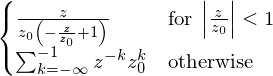

In [2]:
z0 = sym.symbols('z0', complex=True)
sym.summation(z0**k * z**(-k), (k, -sym.oo, -1))

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.